## Diabetes Prediction Challenge -Análise Exploratoria dos Dados
### Contexto
`Playground Series - Season 5, Episode 12)`
### Objetivos
* Avaliar a estrutura, os tipos de variáveis e a qualidade geral dos dados.


In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.patches as mpatches


from setup_notebook import setup_path
setup_path()
from src.functions import *


from matplotlib.colors import LinearSegmentedColormap
import warnings

warnings.filterwarnings("ignore")

color_palette21 = [
    "#004C4C", "#006666", "#008080", "#199191", "#29A3A3",
    "#40B5B5", "#55C7C7", "#66D9D9", "#80ECEC", "#99FFFF", 
    "#FFD580", "#FFC460", "#FFB240", "#FFA020", "#FF8E00",
    "#FF7C00", "#FF6400", "#FF4C00", "#FF3300", "#FF1A00", "#FF0000"]

# Definir cores
color_binary = {
    0: color_palette21[-7],  # Vermelho para não sobreviveu
    1: color_palette21[3]   # Azul para sobreviveu
}

sns.set_palette(sns.color_palette(color_palette21))
sns.color_palette(color_palette21)

[(0.0, 0.2980392156862745, 0.2980392156862745),
 (0.0, 0.4, 0.4),
 (0.0, 0.5019607843137255, 0.5019607843137255),
 (0.09803921568627451, 0.5686274509803921, 0.5686274509803921),
 (0.1607843137254902, 0.6392156862745098, 0.6392156862745098),
 (0.25098039215686274, 0.7098039215686275, 0.7098039215686275),
 (0.3333333333333333, 0.7803921568627451, 0.7803921568627451),
 (0.4, 0.8509803921568627, 0.8509803921568627),
 (0.5019607843137255, 0.9254901960784314, 0.9254901960784314),
 (0.6, 1.0, 1.0),
 (1.0, 0.8352941176470589, 0.5019607843137255),
 (1.0, 0.7686274509803922, 0.3764705882352941),
 (1.0, 0.6980392156862745, 0.25098039215686274),
 (1.0, 0.6274509803921569, 0.12549019607843137),
 (1.0, 0.5568627450980392, 0.0),
 (1.0, 0.48627450980392156, 0.0),
 (1.0, 0.39215686274509803, 0.0),
 (1.0, 0.2980392156862745, 0.0),
 (1.0, 0.2, 0.0),
 (1.0, 0.10196078431372549, 0.0),
 (1.0, 0.0, 0.0)]

---
## 2. Dataload & Pré-visualização dos Dados


In [2]:
# 2-Dataload & Pré-visualização dos Dados
dfo = pd.read_csv("/home/akel/PycharmProjects/Kaggle/Diabetes_Prediction_Challenge/data/raw/train.csv")
df=dfo.drop(columns='id')
NC=df.shape[1]
display(df.head(5))
inital_describe(df)

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,89,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,69,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,60,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


📊 ANÁLISE EXPLORATÓRIA DO DATAFRAME

📈 DIMENSÕES DO DATASET:
   • 700000 linhas
   • 25 colunas
   • Total de células: 17500000

🔧 TIPOS DE DADOS:
   • int64: 13 colunas
   • float64: 6 colunas
   • object: 6 colunas

📋 DETALHAMENTO DOS TIPOS POR COLUNA:
                                       Tipo
age                                   int64
alcohol_consumption_per_week          int64
physical_activity_minutes_per_week    int64
diet_score                          float64
sleep_hours_per_day                 float64
screen_time_hours_per_day           float64
bmi                                 float64
waist_to_hip_ratio                  float64
systolic_bp                           int64
diastolic_bp                          int64
heart_rate                            int64
cholesterol_total                     int64
hdl_cholesterol                       int64
ldl_cholesterol                       int64
triglycerides                         int64
gender                               obje

,count,mean,std,min,25%,50%,75%,max
age,700000.0,50.359734,11.655520,19.00,42.00,50.00,58.00,89.00
alcohol_consumption_per_week,700000.0,2.072411,1.048189,1.00,1.00,2.00,3.00,9.00
physical_activity_minutes_per_week,700000.0,80.230803,51.195071,1.00,49.00,71.00,96.00,747.00
diet_score,700000.0,5.963695,1.463336,0.10,5.00,6.00,7.00,9.90
sleep_hours_per_day,700000.0,7.002200,0.901907,3.10,6.40,7.00,7.60,9.90
screen_time_hours_per_day,700000.0,6.012733,2.022707,0.60,4.60,6.00,7.40,16.50
bmi,700000.0,25.874684,2.860705,15.10,23.90,25.90,27.80,38.40
waist_to_hip_ratio,700000.0,0.858766,0.037980,0.68,0.83,0.86,0.88,1.05
systolic_bp,700000.0,116.294193,11.010390,91.00,108.00,116.00,124.00,163.00
diastolic_bp,700000.0,75.440924,6.825775,51.00,71.00,75.00,80.00,104.00



✅ ANÁLISE CONCLUÍDA


### 2.1 Pré-visualização dos Dados


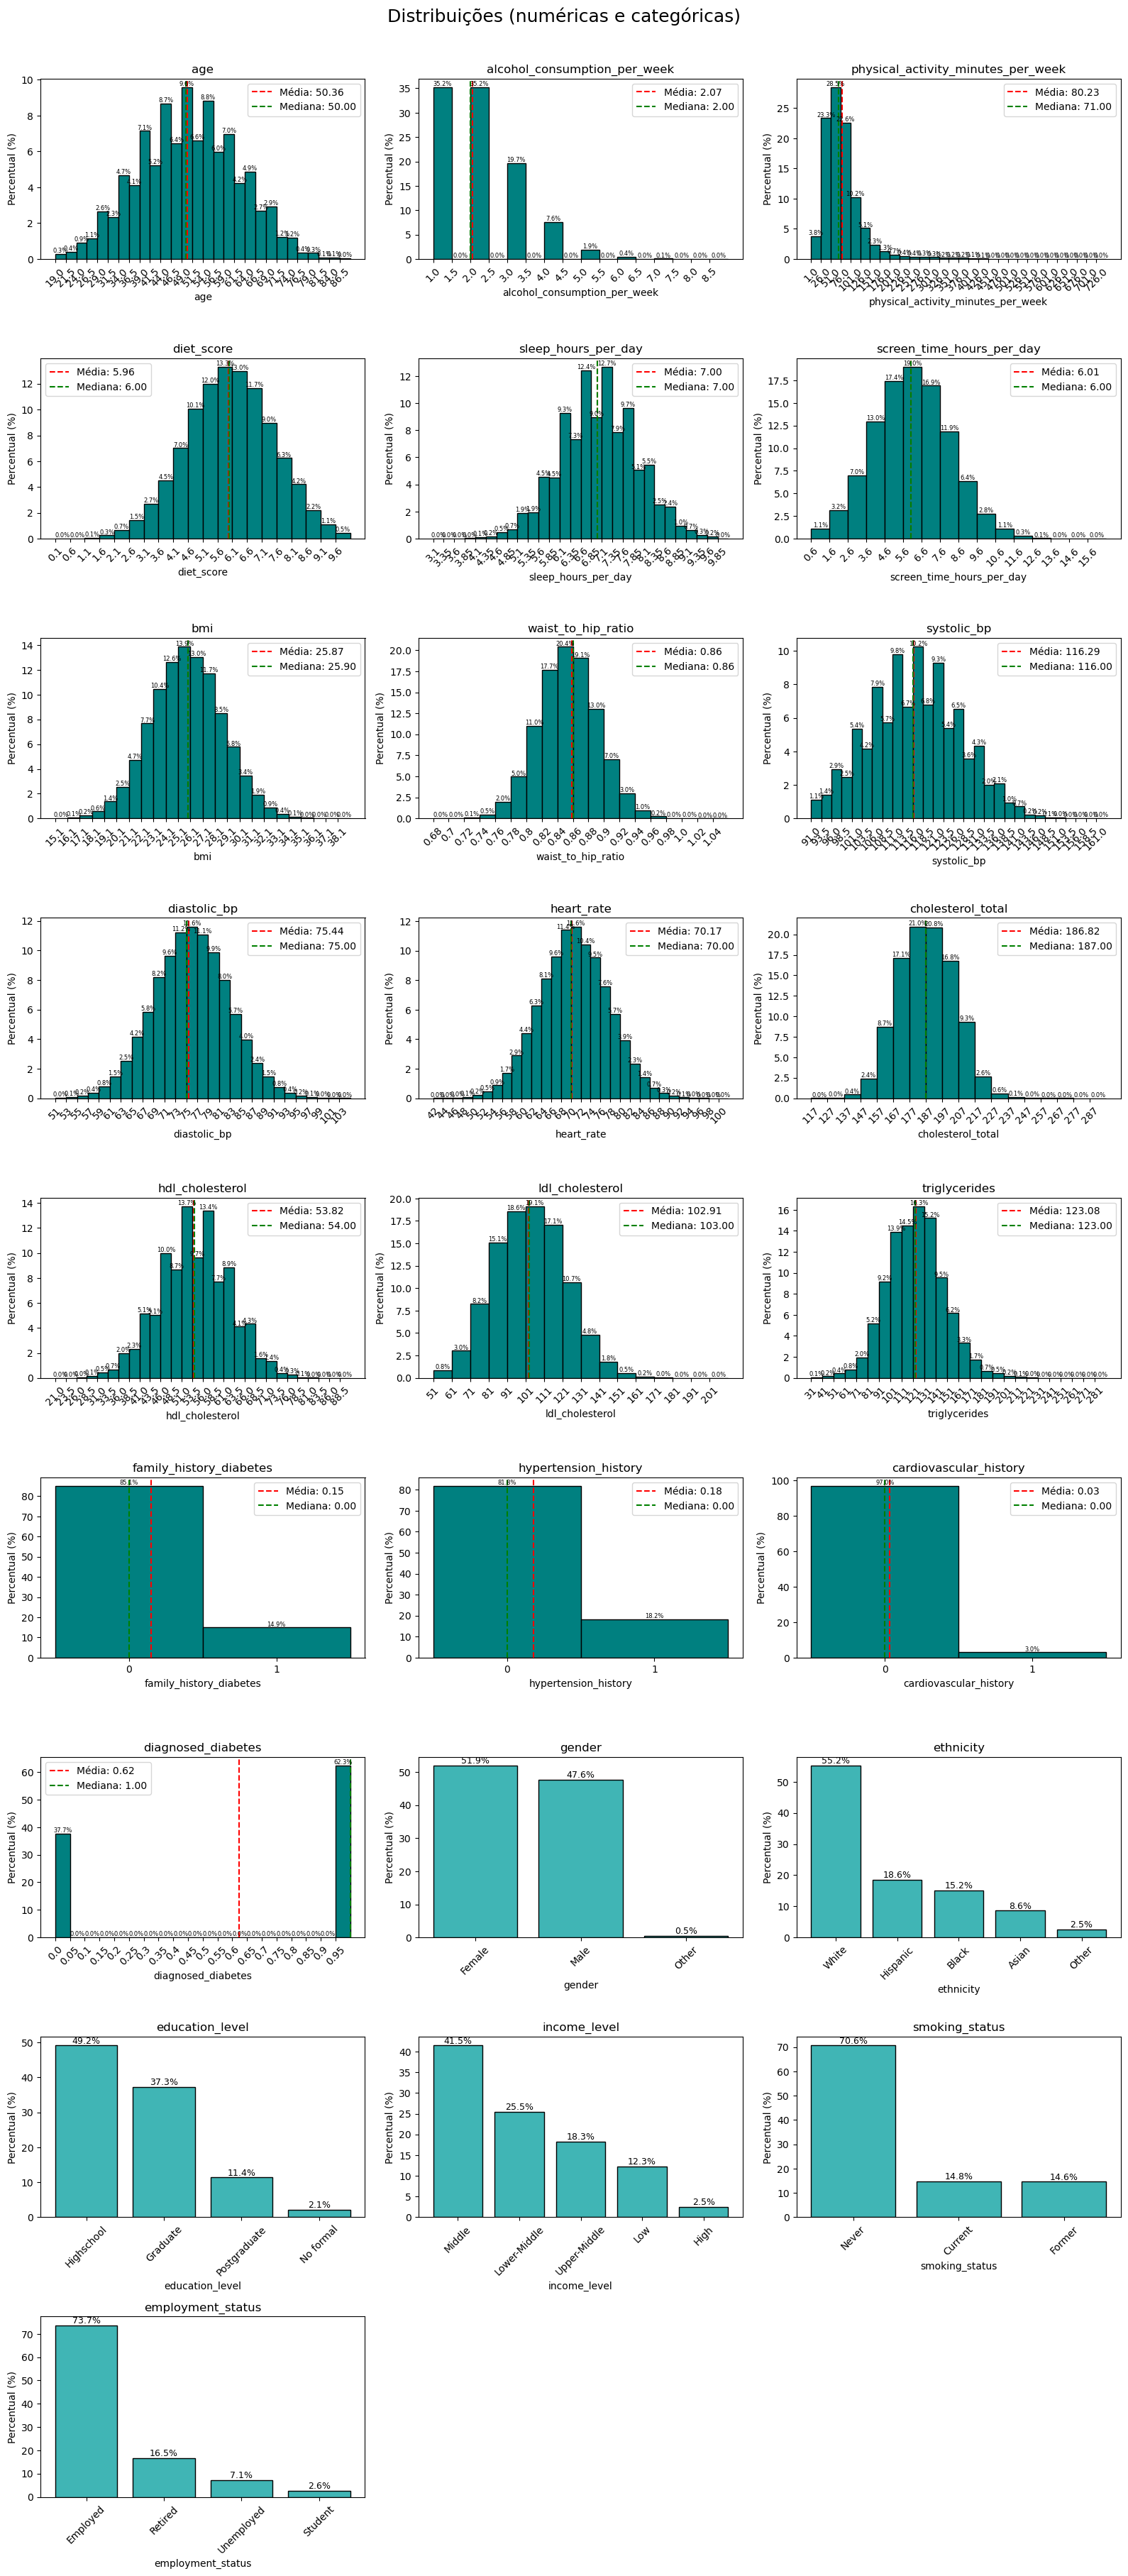

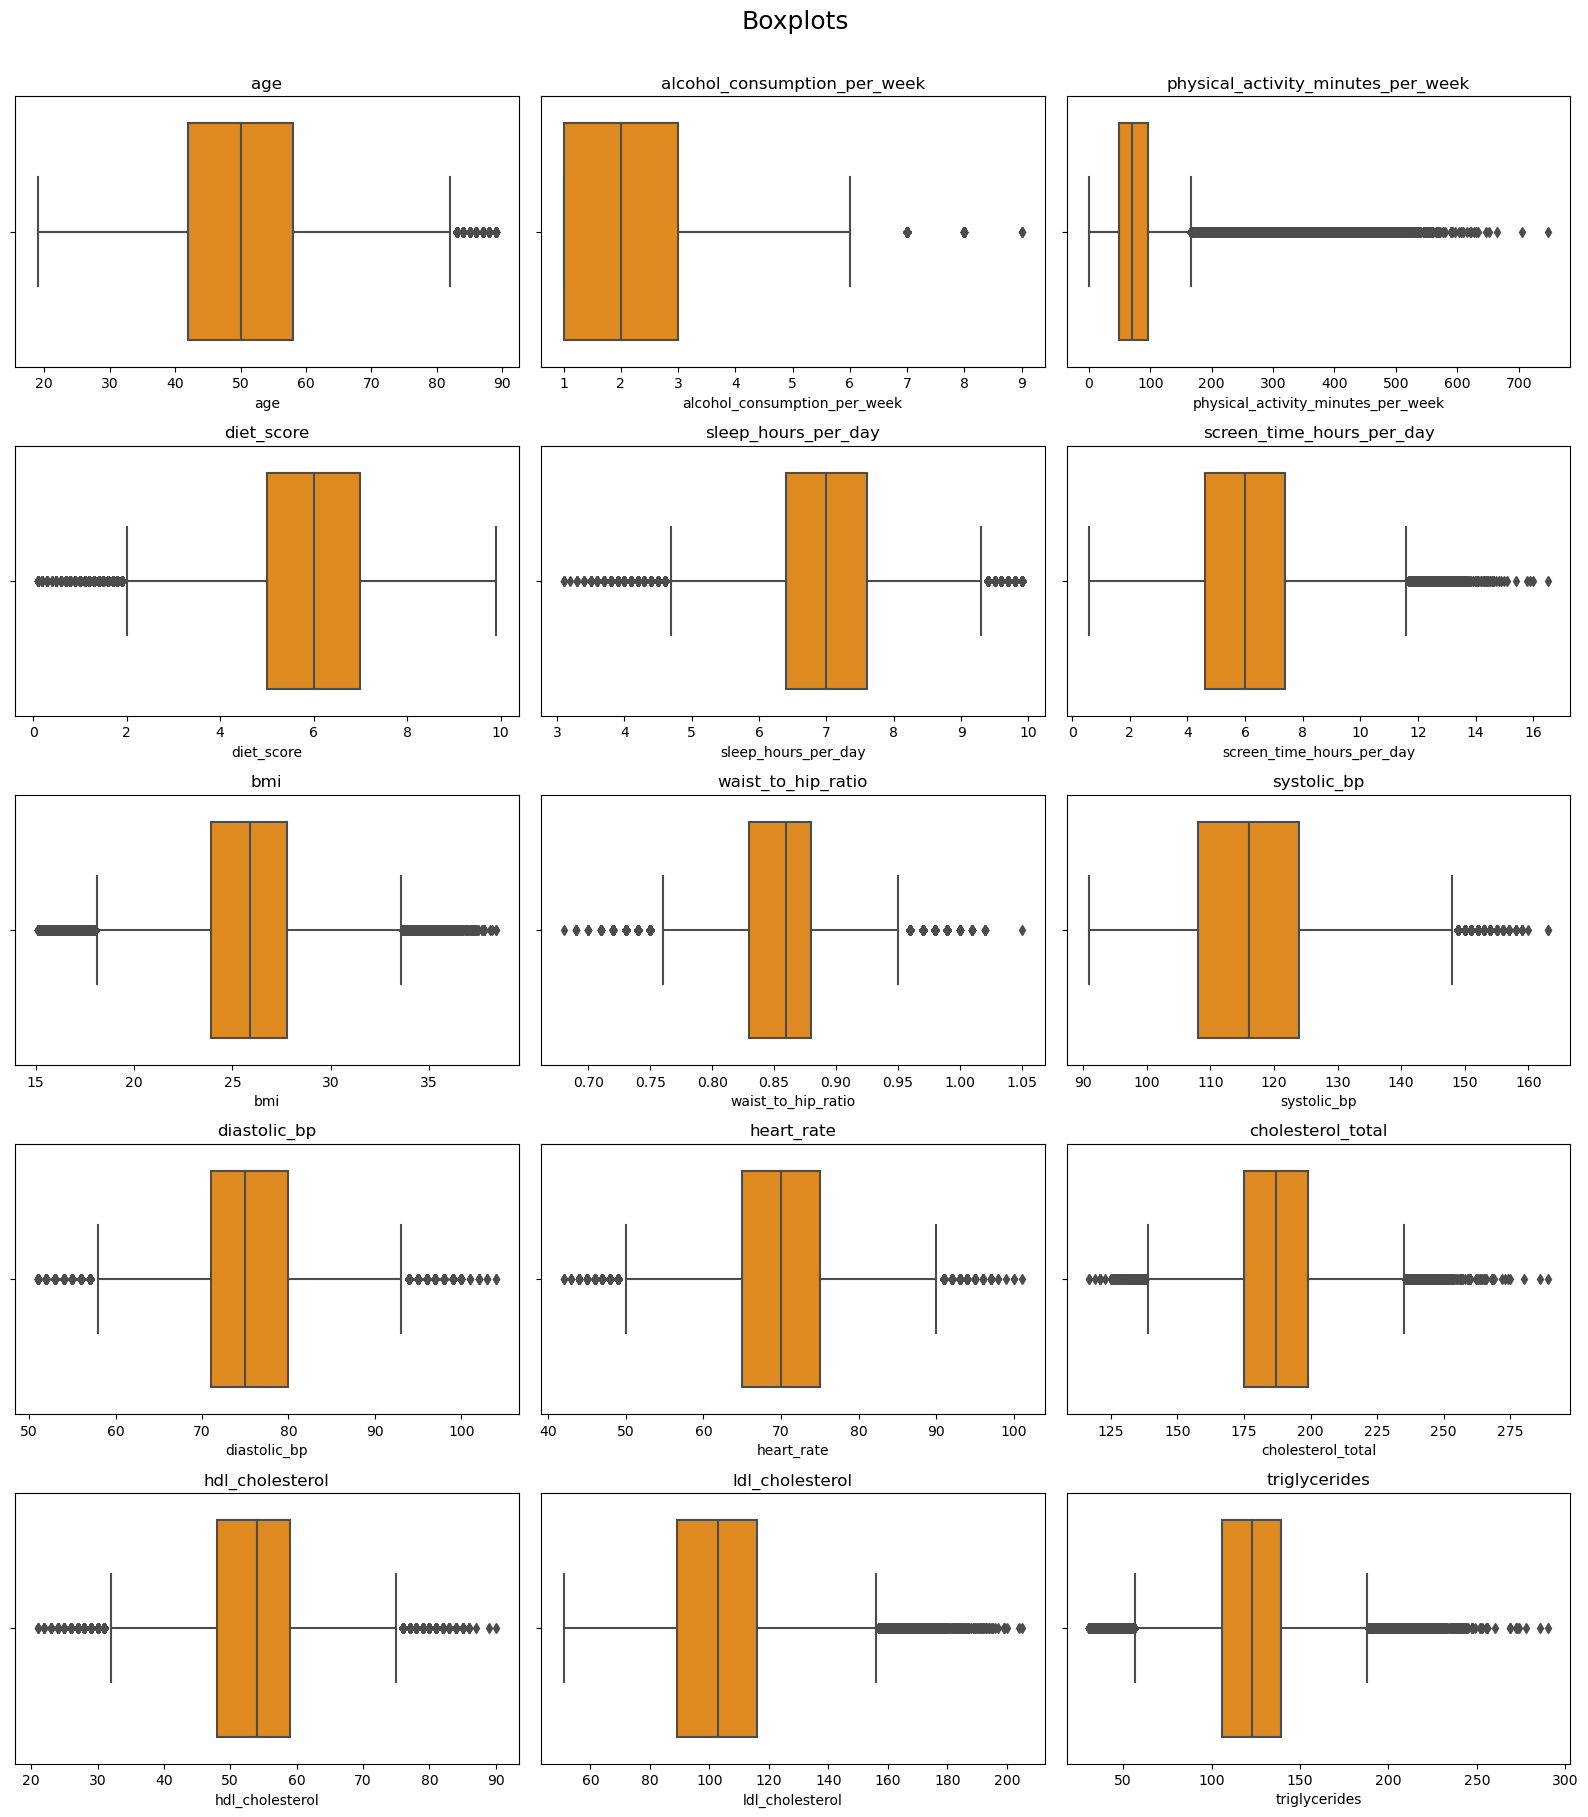

In [40]:

out_1=mult_plt2(df,ncols=3,max_bins=30,figsize=(16,36))
out_2=mult_plt2(df,'box',max_bins=20,figsize=(16, 18))


In [42]:
out_1[out_1['feature']=='age'].head(30)


,feature,x_value,percentual,contagem
0,age,20.25,0.29,2026
1,age,22.75,0.40,2828
2,age,25.25,0.92,6463
3,age,27.75,1.14,7995
4,age,30.25,2.65,18540
5,age,32.75,2.35,16432
6,age,35.25,4.68,32790
7,age,37.75,4.11,28797
8,age,40.25,7.15,50035
9,age,42.75,5.23,36580


### 3.Pré-processamento de Dados


In [4]:
df_filt=remove_outliers_iqr(df,['diagnosed_diabetes','family_history_diabetes','hypertension_history','cardiovascular_history'],10)


Remoção de Outliers (Método IQR) 🧹
                           feature  count_initial  count_removed percent_removed
                               age         700000              0           0.00%
      alcohol_consumption_per_week         700000              0           0.00%
physical_activity_minutes_per_week         700000             31           0.00%
                        diet_score         699969              0           0.00%
               sleep_hours_per_day         699969              0           0.00%
         screen_time_hours_per_day         699969              0           0.00%
                               bmi         699969              0           0.00%
                waist_to_hip_ratio         699969              0           0.00%
                       systolic_bp         699969              0           0.00%
                      diastolic_bp         699969              0           0.00%
                        heart_rate         699969              0         

In [5]:
df_filt['Age_Group'] = pd.cut(
    df_filt['age'],
    bins=[18, 29, 44, 59, 69, 79, np.inf],
    labels=[
        'Jovem Adulto (18–29)',
        'Adulto (30–44)',
        'Meia-idade (45–59)',
        'Idoso Jovem (60–69)',
        'Idoso (70–79)',
        'Idoso Muito Longevo (80+)'
    ],
    include_lowest=True
)


df_filt['PAW_Group'] = pd.cut(
    df_filt['physical_activity_minutes_per_week'],
    bins=[0, 29, 149, 299, np.inf],
    labels=[
        'Sedentário',
        'Baixo (<150)',
        'Recomendado (150-300)',
        'Alto (>300)'
    ],
    include_lowest=True
)

In [6]:
df_filt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699969 entries, 0 to 699999
Data columns (total 27 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   age                                 699969 non-null  int64   
 1   alcohol_consumption_per_week        699969 non-null  int64   
 2   physical_activity_minutes_per_week  699969 non-null  int64   
 3   diet_score                          699969 non-null  float64 
 4   sleep_hours_per_day                 699969 non-null  float64 
 5   screen_time_hours_per_day           699969 non-null  float64 
 6   bmi                                 699969 non-null  float64 
 7   waist_to_hip_ratio                  699969 non-null  float64 
 8   systolic_bp                         699969 non-null  int64   
 9   diastolic_bp                        699969 non-null  int64   
 10  heart_rate                          699969 non-null  int64   
 11  cholesterol_total 

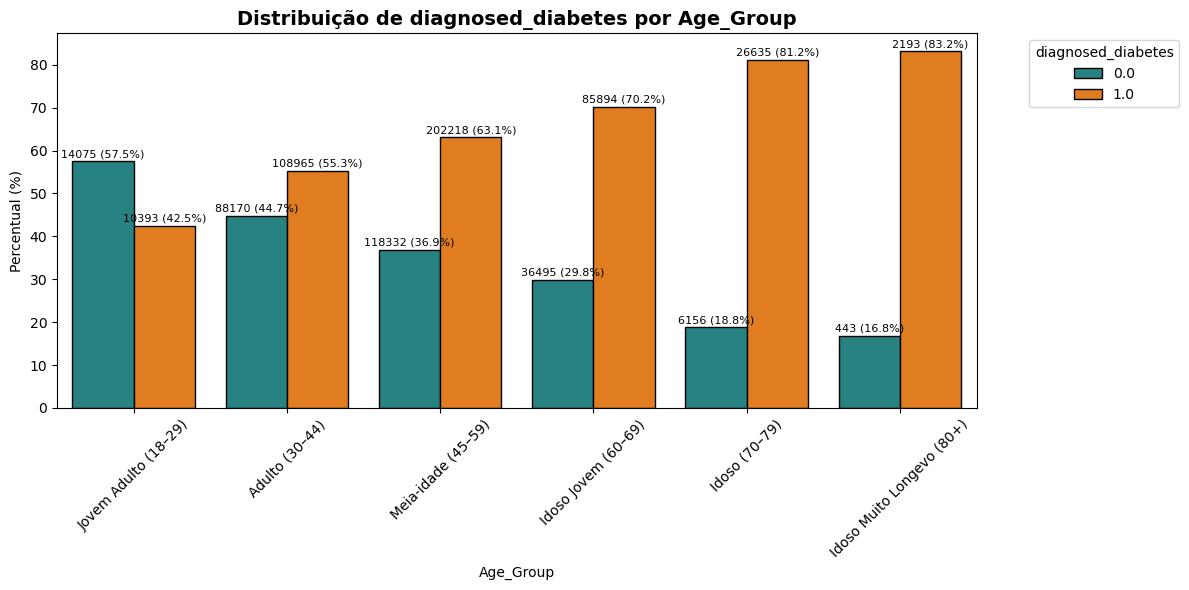

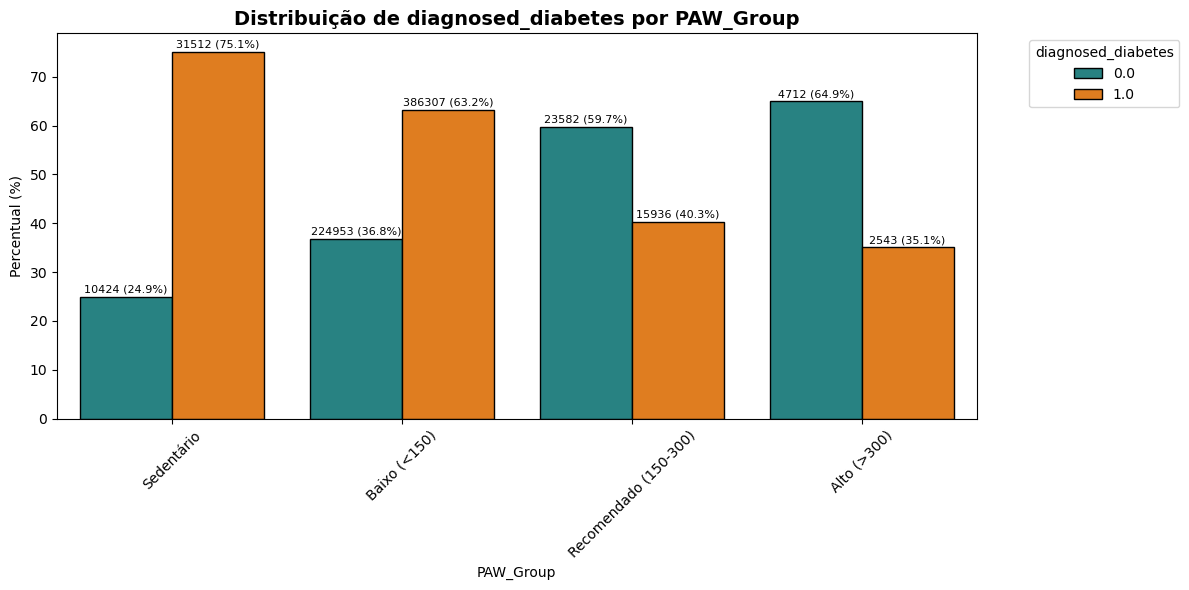

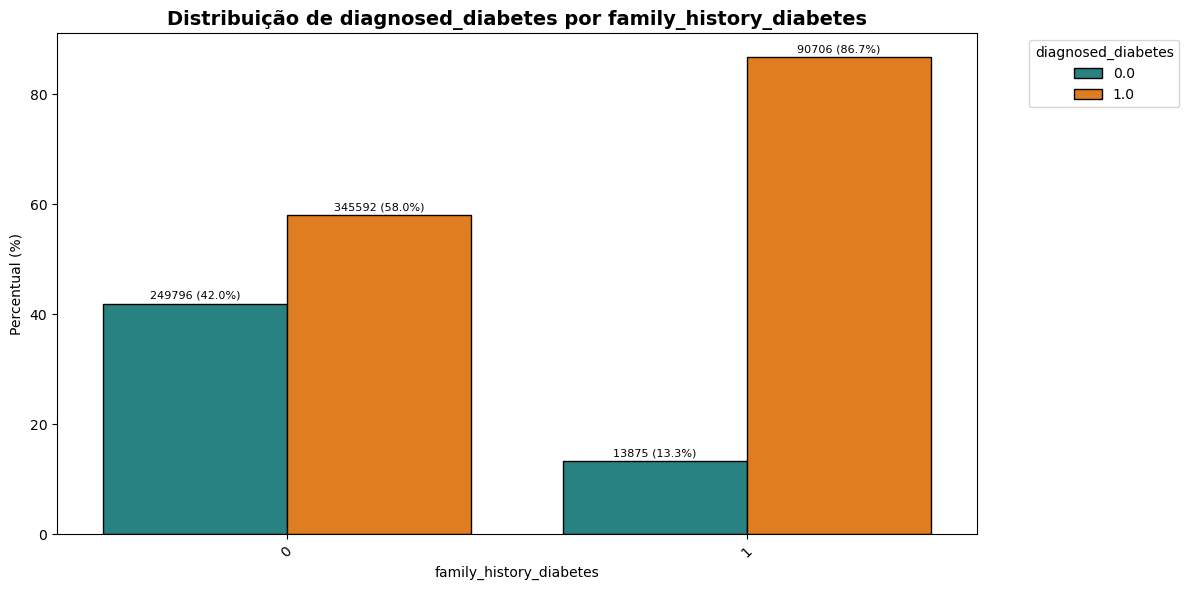

diagnosed_diabetes,0.0,1.0
Age_Group,,
Jovem Adulto (18–29),57.524113,42.475887
Adulto (30–44),44.725696,55.274304
Meia-idade (45–59),36.915302,63.084698
Idoso Jovem (60–69),29.818856,70.181144
Idoso (70–79),18.773444,81.226556
Idoso Muito Longevo (80+),16.805766,83.194234


In [58]:
stats1,stats2= bar_bar_cat(df_filt,'Age_Group','diagnosed_diabetes')
stats3,stats4= bar_bar_cat(df_filt,'PAW_Group','diagnosed_diabetes')
stats5,stats6= bar_bar_cat(df_filt,'family_history_diabetes','diagnosed_diabetes')


In [65]:
TARGET='diagnosed_diabetes'

X_train = df_filt.drop(columns=TARGET)
y_train = df_filt[TARGET]
tmp = X_train.copy()
tmp['target'] = y_train

age_prob = tmp.groupby('PAW_Group')['target'].mean()
age_prob

PAW_Group
Sedentário               0.751431
Baixo (<150)             0.631985
Recomendado (150-300)    0.403259
Alto (>300)              0.350517
Name: target, dtype: float64

In [48]:
#Risk_age_cont
min_age = df_filt['age'].min()
max_age = df_filt['age'].max()

df_filt['risk_age_cont'] = (df_filt['age'] - min_age) / (max_age - min_age)

# Usamos log para tratar a "cauda longa" e invertemos (menos minutos = mais risco).
df_filt['risk_paw_cont'] = 1 / (np.log1p(df_filt['physical_activity_minutes_per_week']) + 1)
# Normalizando para [0, 1]
df_filt['risk_paw_cont'] = (df_filt['risk_paw_cont'] - df_filt['risk_paw_cont'].min()) / \
                           (df_filt['risk_paw_cont'].max() - df_filt['risk_paw_cont'].min())

# --- SCORE FINAL COMBINADO ---
# Peso 0.4 para Histórico (seu fator mais forte), 0.35 para Idade e 0.25 para Atividade
df_filt['continuous_risk_score'] = (
    (df_filt['risk_age_cont'] * 0.35) + 
    (df_filt['risk_paw_cont'] * 0.15) + 
    (df_filt['family_history_diabetes'].astype(float) * 0.50)
)



In [32]:
# 1. Mapeamento baseado nos dados que você extraiu (taxa de 1.0)
# 1. Seus dados de prevalência (taxa de diagnosed_diabetes == 1.0)
age_prob = {
    'Jovem Adulto (18–29)': 0.4247,
    'Adulto (30–44)': 0.5527,
    'Meia-idade (45–59)': 0.6308,
    'Idoso Jovem (60–69)': 0.7018,
    'Idoso (70–79)': 0.8122,
    'Idoso Muito Longevo (80+)': 0.8319
}

paw_prob = {
    'Sedentário': 0.7514,
    'Baixo (<150)': 0.6319,
    'Recomendado (150-300)': 0.4032,
    'Alto (>300)': 0.3505
}

# Histórico familiar é o mais forte: 0 -> 58% | 1 -> 86.7%
fh_prob = {
    0: 0.5804,
    1: 0.8673
}

# 2. Criando as colunas de risco individual (Target Encoding)
df_filt['risk_age_p'] = df_filt['Age_Group'].map(age_prob).astype(float).fillna(0.5)
df_filt['risk_paw_p'] = df_filt['PAW_Group'].map(paw_prob).astype(float).fillna(0.5)
df_filt['risk_fh_p'] = df_filt['family_history_diabetes'].map(fh_prob).astype(float).fillna(0.5)

# 3. O "Super Score" Probabilístico
# Calculamos a média das probabilidades para dar ao modelo uma visão holística
df_filt['global_prob_risk'] = (
    df_filt['risk_age_p'] + 
    df_filt['risk_paw_p'] + 
    df_filt['risk_fh_p']
) / 3



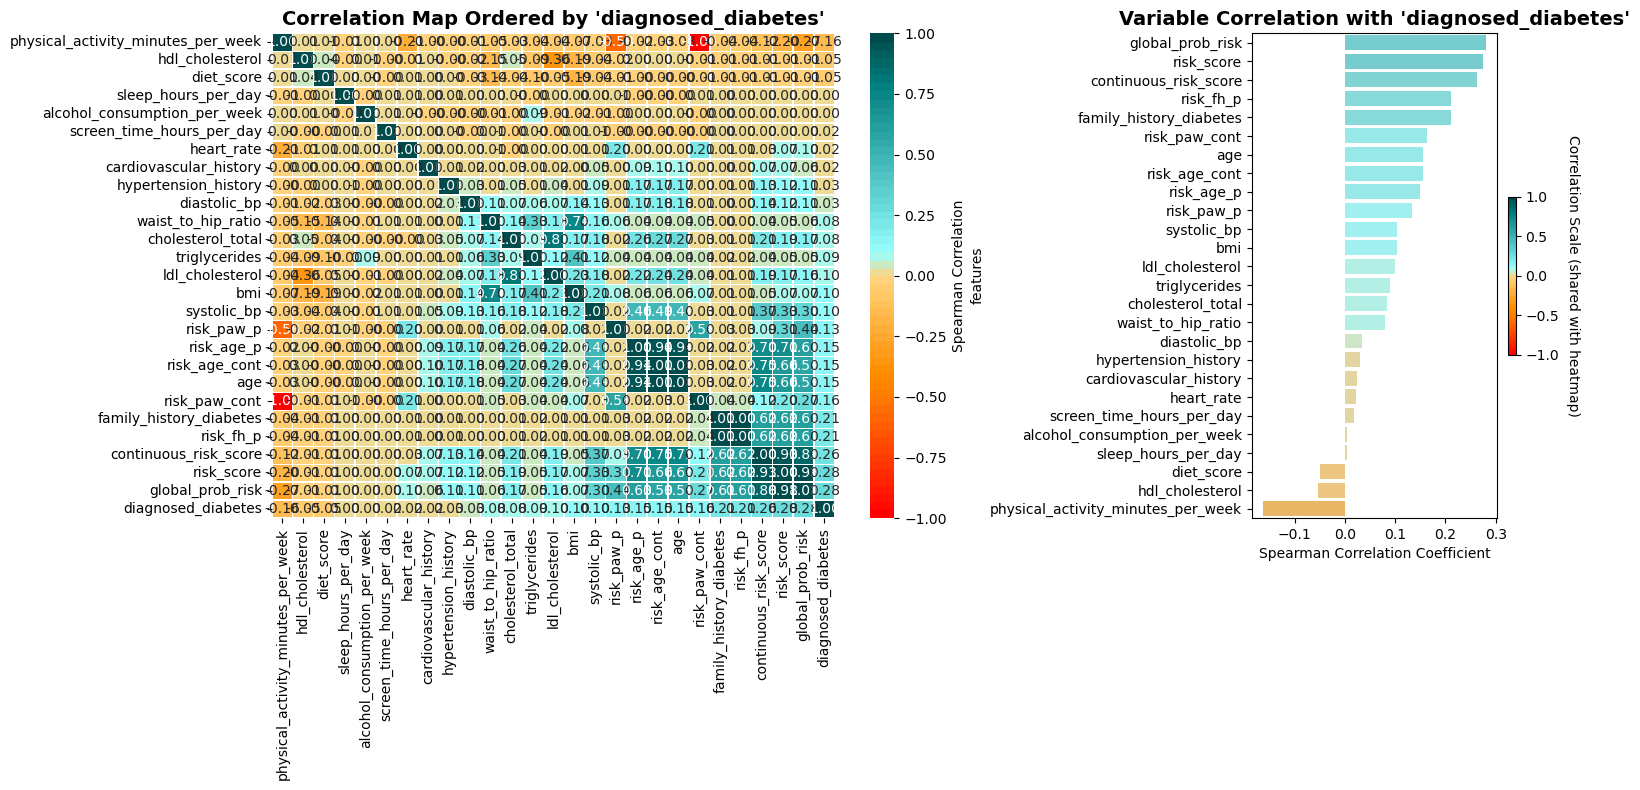

In [49]:
corr,corr_tag=correlation_bar(df_filt,'diagnosed_diabetes',metodo='spearman')


In [56]:
print('continuous_risk_score')
print(df_filt.groupby('diagnosed_diabetes')['continuous_risk_score'].agg(['mean', 'std', 'median']))
print('global_prob_risk')
print(df_filt.groupby('diagnosed_diabetes')['global_prob_risk'].agg(['mean', 'std', 'median']))

corr

continuous_risk_score
                        mean       std    median
diagnosed_diabetes                              
0.0                 0.188314  0.124817  0.166074
1.0                 0.287557  0.210144  0.204818
global_prob_risk
                        mean       std    median
diagnosed_diabetes                              
0.0                 0.604907  0.041483  0.614367
1.0                 0.634344  0.049884  0.614367


,physical_activity_minutes_per_week,hdl_cholesterol,diet_score,sleep_hours_per_day,alcohol_consumption_per_week,screen_time_hours_per_day,heart_rate,cardiovascular_history,hypertension_history,diastolic_bp,...,risk_age_p,risk_age_cont,age,risk_paw_cont,family_history_diabetes,risk_fh_p,continuous_risk_score,risk_score,global_prob_risk,diagnosed_diabetes
physical_activity_minutes_per_week,1.000000,0.009424,0.009584,-0.007762,0.001687,0.002068,-0.213619,-0.000181,-0.003187,-0.013448,...,-0.023851,-0.026719,-0.026719,-1.000000,-0.035886,-0.035886,-0.120472,-0.197890,-0.274092,-0.162902
hdl_cholesterol,0.009424,1.000000,0.041724,-0.000631,0.008409,-0.003713,-0.011040,0.000152,-0.001078,-0.024285,...,0.003131,0.002922,0.002922,-0.009424,-0.011172,-0.011172,-0.007072,-0.011346,-0.013689,-0.052704
diet_score,0.009584,0.041724,1.000000,0.000921,0.001151,-0.000913,0.006810,0.002350,0.001605,-0.025685,...,-0.003692,-0.000717,-0.000717,-0.009584,-0.005816,-0.005816,-0.005028,-0.009323,-0.010535,-0.049711
sleep_hours_per_day,-0.007762,-0.000631,0.000921,1.000000,-0.001285,0.007874,0.009291,0.002078,0.005494,0.002833,...,-0.001055,-0.000783,-0.000783,0.007762,0.002467,0.002467,0.001975,0.002330,0.002593,0.003846
alcohol_consumption_per_week,0.001687,0.008409,0.001151,-0.001285,1.000000,0.006515,0.002144,-0.001569,-0.004142,-0.001157,...,0.002500,0.003101,0.003101,-0.001687,0.002659,0.002659,0.004655,0.003375,0.002669,0.004760
screen_time_hours_per_day,0.002068,-0.003713,-0.000913,0.007874,0.006515,1.000000,0.000187,0.000567,0.001389,-0.003818,...,-0.002019,-0.003256,-0.003256,-0.002068,0.004111,0.004111,0.000308,0.000800,0.000525,0.018237
heart_rate,-0.213619,-0.011040,0.006810,0.009291,0.002144,0.000187,1.000000,0.002469,0.000103,0.003497,...,0.003397,0.003928,0.003928,0.213619,0.007653,0.007653,0.025376,0.065415,0.095361,0.022567
cardiovascular_history,-0.000181,0.000152,0.002350,0.002078,-0.001569,0.000567,0.002469,1.000000,0.012263,0.015611,...,0.093662,0.096518,0.096518,0.000181,0.002349,0.002349,0.072922,0.067513,0.059995,0.024741
hypertension_history,-0.003187,-0.001078,0.001605,0.005494,-0.004142,0.001389,0.000103,0.012263,1.000000,0.034485,...,0.165340,0.173877,0.173877,0.003187,0.008304,0.008304,0.133801,0.122033,0.109683,0.029985
diastolic_bp,-0.013448,-0.024285,-0.025685,0.002833,-0.001157,-0.003818,0.003497,0.015611,0.034485,1.000000,...,0.171335,0.179878,0.179878,0.013448,0.004241,0.004241,0.136851,0.124669,0.112830,0.034918


In [55]:
# map_edu = {'No formal': 0, 'Highschool': 1, 'Graduate': 2, 'Postgraduate': 3} 
# df_filt['education_level'] = df_filt['education_level'].map(map_edu)

# # Mapeamento para Renda
# map_income = {'Low': 0, 'Lower-Middle': 1, 'Middle': 2, 'Upper-Middle': 3, 'High': 4}
# df_filt['income_level'] = df_filt['income_level'].map(map_income)


# # Colunas que não têm ordem
# cols_nominais = ['gender', 'ethnicity', 'smoking_status', 'employment_status']
# df_filt = pd.get_dummies(df_filt, columns=cols_nominais, drop_first=True)


In [11]:
# df_filt.columns
# inital_describe(df_filt,True)

In [12]:
# df_filt.head(10)